In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 8.5 MB/s 
     |████████████████████████████████| 182 kB 22.8 MB/s 
     |████████████████████████████████| 132 kB 33.7 MB/s 
     |████████████████████████████████| 212 kB 19.4 MB/s 
     |████████████████████████████████| 127 kB 36.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import list_datasets, load_dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
dataset = load_dataset('squad') ## downloading squad dataset

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
dataset = dataset.shuffle(seed=42)
train_squad = pd.DataFrame(dataset["train"][:20000])
test_squad = pd.DataFrame(dataset["validation"][:2000])

In [ ]:
train_squad

,id,title,context,question,answers
0,573173d8497a881900248f0c,Egypt,The Pew Forum on Religion & Public Life ranks ...,What percentage of Egyptians polled support de...,"{'text': ['84%'], 'answer_start': [468]}"
1,57277e815951b619008f8b52,"Ann_Arbor,_Michigan",The Ann Arbor Hands-On Museum is located in a ...,Ann Arbor ranks 1st among what goods sold?,"{'text': ['books'], 'answer_start': [402]}"
2,5727e2483acd2414000deef0,Rule_of_law,One important aspect of the rule-of-law initia...,"In developing countries, who makes most of the...","{'text': ['the executive'], 'answer_start': [6..."
3,5728f5716aef0514001548cc,Samurai,"In December 1547, Francis was in Malacca (Mala...",Who impressed Xavier by taking notes in church?,"{'text': ['Anjiro'], 'answer_start': [160]}"
4,572826002ca10214002d9f16,Group_(mathematics),Groups are also applied in many other mathemat...,What represents elements of the fundamental gr...,"{'text': ['loops'], 'answer_start': [489]}"
...,...,...,...,...,...
19995,572fc229b2c2fd1400568403,The_Blitz,"Dowding accepted that as AOC, he was responsib...",Who was reluctant to act quickly when urgent c...,"{'text': ['Dowding'], 'answer_start': [205]}"
19996,56ce7d1aaab44d1400b8880a,Solar_energy,The International Organization for Standardiza...,ISO 10217 relates to standards for what?,{'text': ['materials used in solar water heate...
19997,56fb9339b28b3419009f1e42,Middle_Ages,"In the early 15th century, the countries of th...",What English monarch financed John Cabot?,"{'text': ['Henry VII'], 'answer_start': [639]}"
19998,5725c0cfec44d21400f3d4cf,Hellenistic_period,The third war of the Diadochi broke out becaus...,When was the Battle of Gaza?,"{'text': ['312 BC'], 'answer_start': [554]}"


In [ ]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [ ]:
brief_cleaning1 = text_strip(train_squad['context'])
brief_cleaning2 = text_strip(train_squad['question'])

In [ ]:
from time import time
import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
context = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000 )]
#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Time to clean up everything: 2.48 mins


In [ ]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
question = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.29 mins


In [ ]:
context[0]

'the pew forum on religion public life ranks egypt as the fifth worst country in the world for religious freedom the united states commission on international religious freedom bipartisan independent agency of the us government has placed egypt on its watch list of countries that require close monitoring due to the nature and extent of violations of religious freedom engaged in or tolerated by the government according to 2010 pew global attitudes survey 84% of egyptians polled supported the death penalty for those who leave islam 77% supported whippings and cutting off of hands for theft and robbery and 82% support stoning person who commits adultery.'

In [ ]:
question[0]

'_START_ what percentage of egyptians polled support death penalty for those leaving islam  _END_'

In [ ]:
train_squad['cleaned_context'] = pd.Series(context)
train_squad['cleaned_question'] = pd.Series(question)

In [ ]:
text_count = []
summary_count = []

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
train_squad['cleaned_context'] = train_squad['cleaned_context'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_squad['cleaned_question'] = train_squad['cleaned_question'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_squad['cleaned_question']

0        _START_ percentage egyptians polled support de...
1        _START_ ann arbor ranks 1st among goods sold _...
2        _START_ developing countries makes spending de...
3        _START_ impressed xavier taking notes church _...
4        _START_ represents elements fundamental group ...
                               ...                        
19995    _START_ reluctant act quickly urgent changes n...
19996            _START_ iso 10217 relates standards _END_
19997    _START_ english monarch financed john cabot _END_
19998                            _START_ battle gaza _END_
19999          _START_ founded first armenian nation _END_
Name: cleaned_question, Length: 20000, dtype: object

In [ ]:
for sent in train_squad['cleaned_context']:
    text_count.append(len(sent.split()))
for sent in train_squad['cleaned_question']:
    summary_count.append(len(sent.split()))

In [ ]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

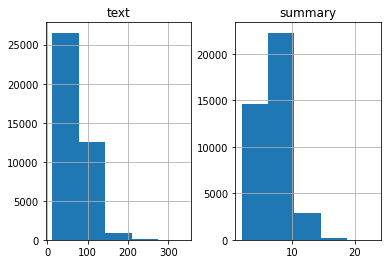

In [ ]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [ ]:
#Check how much % of summary have 0-15 words
cnt=0
for i in train_squad['cleaned_question']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(train_squad['cleaned_question']))

0.9978


In [ ]:
#Check how much % of text have 0-70 words
cnt=0
for i in train_squad['cleaned_text']:
    if(len(i.split())<=280):
        cnt=cnt+1
print(cnt/len(train_squad['cleaned_text']))

0.99105


In [ ]:
max_context_len = 280
max_question_len = 20

In [ ]:
#Select the Summaries and Text between max len defined above
import numpy as np
cleaned_text =np.array(train_squad['cleaned_context'])
cleaned_summary=np.array(train_squad['cleaned_question'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_question_len and len(cleaned_text[i].split())<=max_context_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'context':short_text,'question':short_summary})

In [ ]:
post_pre['question'] = post_pre['question'].apply(lambda x : 'sostok '+ x + ' eostok')


In [ ]:
post_pre.question[0]


'sostok _START_ percentage egyptians polled support death penalty leaving islam _END_ eostok'

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['context']),np.array(post_pre['question']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 57.83554376657825
Total Coverage of rare words: 4.841780312798653


In [ ]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_context_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_context_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 27819


In [ ]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=3

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.09018264840184
Total Coverage of rare words: 8.323882166971257


In [ ]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_question_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_question_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 5942


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
x_tr